In [1]:
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from normalise import normalise
import seaborn as sns
import re
sns.set()
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

C:\Users\Tiyani Baloyi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.semi_supervised.label_propagation module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.semi_supervised. Anything that cannot be imported from sklearn.semi_supervised is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Tiyani Baloyi\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LabelPropagation from version 0.18 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
[nltk_data] Downloading package wordnet to C:\Users\Tiyani
[nltk_data]     Baloyi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
test_data = pd.read_csv("test_with_no_labels.csv")

In [4]:
train_data.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


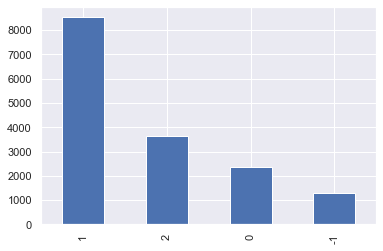

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [5]:
train_data['sentiment'].value_counts().plot(kind = 'bar')
plt.show()
train_data["sentiment"].value_counts()

In [6]:
test_data.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [7]:
train_data.shape

(15819, 3)

In [8]:
test_data.shape

(10546, 2)

In [9]:
train_data.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [10]:
test_data.isnull().sum()

message    0
tweetid    0
dtype: int64

In [11]:
# convert all texts for the train data to lowercase
train_df = train_data.applymap(lambda s:s.lower() if type(s) == str else s)

In [12]:
# convert all texts for the test data to lowercase
test_df = test_data.applymap(lambda s:s.lower() if type(s) == str else s)

In [13]:
train_df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn't think carbon di...,625221
1,1,it's not like we lack evidence of anthropogeni...,126103
2,2,rt @rawstory: researchers say we have three ye...,698562
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954


In [14]:
test_df.head()

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,"the scary, unimpeachable evidence that climate...",224985
3,@karoli @morgfair @osborneink @dailykos \nputi...,476263
4,rt @fakewillmoore: 'female orgasms cause globa...,872928


In [15]:
# create a function that remove punctuation
def remove_punctuation(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

In [16]:
test_df["no_punctuation"] = test_df["message"].apply(remove_punctuation)
test_df.head()

,message,tweetid,no_punctuation
0,europe will now be looking to china to make su...,169760,europe will now be looking to china to make su...
1,combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...
2,"the scary, unimpeachable evidence that climate...",224985,the scary unimpeachable evidence that climate ...
3,@karoli @morgfair @osborneink @dailykos \nputi...,476263,karoli morgfair osborneink dailykos \nputin go...
4,rt @fakewillmoore: 'female orgasms cause globa...,872928,rt fakewillmoore female orgasms cause global w...


In [17]:
train_df["no_punctuation"] = train_df["message"].apply(lambda x: remove_punctuation(x))
train_df.head()

,sentiment,message,tweetid,no_punctuation
0,1,polyscimajor epa chief doesn't think carbon di...,625221,polyscimajor epa chief doesnt think carbon dio...
1,1,it's not like we lack evidence of anthropogeni...,126103,its not like we lack evidence of anthropogenic...
2,2,rt @rawstory: researchers say we have three ye...,698562,rt rawstory researchers say we have three year...
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,todayinmaker wired was a pivotal year in the...
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,rt soynoviodetodas its and a racist sexist cl...


In [18]:

test_df["token"] = test_df["no_punctuation"].apply(word_tokenize) 
test_df.head()

,message,tweetid,no_punctuation,token
0,europe will now be looking to china to make su...,169760,europe will now be looking to china to make su...,"[europe, will, now, be, looking, to, china, to..."
1,combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...,"[combine, this, with, the, polling, of, staffe..."
2,"the scary, unimpeachable evidence that climate...",224985,the scary unimpeachable evidence that climate ...,"[the, scary, unimpeachable, evidence, that, cl..."
3,@karoli @morgfair @osborneink @dailykos \nputi...,476263,karoli morgfair osborneink dailykos \nputin go...,"[karoli, morgfair, osborneink, dailykos, putin..."
4,rt @fakewillmoore: 'female orgasms cause globa...,872928,rt fakewillmoore female orgasms cause global w...,"[rt, fakewillmoore, female, orgasms, cause, gl..."


In [19]:
train_df["token"] = train_df["no_punctuation"].apply(word_tokenize) 
train_df.head()

,sentiment,message,tweetid,no_punctuation,token
0,1,polyscimajor epa chief doesn't think carbon di...,625221,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,it's not like we lack evidence of anthropogeni...,126103,its not like we lack evidence of anthropogenic...,"[its, not, like, we, lack, evidence, of, anthr..."
2,2,rt @rawstory: researchers say we have three ye...,698562,rt rawstory researchers say we have three year...,"[rt, rawstory, researchers, say, we, have, thr..."
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,todayinmaker wired was a pivotal year in the...,"[todayinmaker, wired, was, a, pivotal, year, i..."
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,rt soynoviodetodas its and a racist sexist cl...,"[rt, soynoviodetodas, its, and, a, racist, sex..."


In [20]:
test_df.head()

,message,tweetid,no_punctuation,token
0,europe will now be looking to china to make su...,169760,europe will now be looking to china to make su...,"[europe, will, now, be, looking, to, china, to..."
1,combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...,"[combine, this, with, the, polling, of, staffe..."
2,"the scary, unimpeachable evidence that climate...",224985,the scary unimpeachable evidence that climate ...,"[the, scary, unimpeachable, evidence, that, cl..."
3,@karoli @morgfair @osborneink @dailykos \nputi...,476263,karoli morgfair osborneink dailykos \nputin go...,"[karoli, morgfair, osborneink, dailykos, putin..."
4,rt @fakewillmoore: 'female orgasms cause globa...,872928,rt fakewillmoore female orgasms cause global w...,"[rt, fakewillmoore, female, orgasms, cause, gl..."


In [21]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [22]:
test_df['token'].apply(lambda x: [item for item in x if item not in stopwords])
test_df

,message,tweetid,no_punctuation,token
0,europe will now be looking to china to make su...,169760,europe will now be looking to china to make su...,"[europe, will, now, be, looking, to, china, to..."
1,combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...,"[combine, this, with, the, polling, of, staffe..."
2,"the scary, unimpeachable evidence that climate...",224985,the scary unimpeachable evidence that climate ...,"[the, scary, unimpeachable, evidence, that, cl..."
3,@karoli @morgfair @osborneink @dailykos \nputi...,476263,karoli morgfair osborneink dailykos \nputin go...,"[karoli, morgfair, osborneink, dailykos, putin..."
4,rt @fakewillmoore: 'female orgasms cause globa...,872928,rt fakewillmoore female orgasms cause global w...,"[rt, fakewillmoore, female, orgasms, cause, gl..."
...,...,...,...,...
10541,"rt @brittanybohrer: brb, writing a poem about ...",895714,rt brittanybohrer brb writing a poem about cli...,"[rt, brittanybohrer, brb, writing, a, poem, ab..."
10542,2016: the year climate change came home: durin...,875167,the year climate change came home during the ...,"[the, year, climate, change, came, home, durin..."
10543,rt @loop_vanuatu: pacific countries positive a...,78329,rt loopvanuatu pacific countries positive abou...,"[rt, loopvanuatu, pacific, countries, positive..."
10544,"rt @xanria_00018: you’re so hot, you must be t...",867455,rt xanria you’re so hot you must be the cause ...,"[rt, xanria, you, ’, re, so, hot, you, must, b..."


In [23]:
train_df['no_stopwords'] = train_df['token'].apply(lambda x: [item for item in x if item not in stopwords])
train_df.head()

,sentiment,message,tweetid,no_punctuation,token,no_stopwords
0,1,polyscimajor epa chief doesn't think carbon di...,625221,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,it's not like we lack evidence of anthropogeni...,126103,its not like we lack evidence of anthropogenic...,"[its, not, like, we, lack, evidence, of, anthr...","[like, lack, evidence, anthropogenic, global, ..."
2,2,rt @rawstory: researchers say we have three ye...,698562,rt rawstory researchers say we have three year...,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstory, researchers, say, three, years,..."
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,todayinmaker wired was a pivotal year in the...,"[todayinmaker, wired, was, a, pivotal, year, i...","[todayinmaker, wired, pivotal, year, war, clim..."
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,rt soynoviodetodas its and a racist sexist cl...,"[rt, soynoviodetodas, its, and, a, racist, sex...","[rt, soynoviodetodas, racist, sexist, climate,..."


In [24]:
test_df['no_stopwords'] = test_df['token'].apply(lambda x: [item for item in x if item not in stopwords])
test_df.head()

,message,tweetid,no_punctuation,token,no_stopwords
0,europe will now be looking to china to make su...,169760,europe will now be looking to china to make su...,"[europe, will, now, be, looking, to, china, to...","[europe, looking, china, make, sure, alone, fi..."
1,combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...,"[combine, this, with, the, polling, of, staffe...","[combine, polling, staffers, climate, change, ..."
2,"the scary, unimpeachable evidence that climate...",224985,the scary unimpeachable evidence that climate ...,"[the, scary, unimpeachable, evidence, that, cl...","[scary, unimpeachable, evidence, climate, chan..."
3,@karoli @morgfair @osborneink @dailykos \nputi...,476263,karoli morgfair osborneink dailykos \nputin go...,"[karoli, morgfair, osborneink, dailykos, putin...","[karoli, morgfair, osborneink, dailykos, putin..."
4,rt @fakewillmoore: 'female orgasms cause globa...,872928,rt fakewillmoore female orgasms cause global w...,"[rt, fakewillmoore, female, orgasms, cause, gl...","[rt, fakewillmoore, female, orgasms, cause, gl..."


In [25]:
stemmer = SnowballStemmer('english')

In [26]:
def word_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [27]:
train_df['stem'] = train_df['no_stopwords'].apply(word_stemmer, args=(stemmer, ))
train_df.head()

,sentiment,message,tweetid,no_punctuation,token,no_stopwords,stem
0,1,polyscimajor epa chief doesn't think carbon di...,625221,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,it's not like we lack evidence of anthropogeni...,126103,its not like we lack evidence of anthropogenic...,"[its, not, like, we, lack, evidence, of, anthr...","[like, lack, evidence, anthropogenic, global, ...","[like, lack, evid, anthropogen, global, warm]"
2,2,rt @rawstory: researchers say we have three ye...,698562,rt rawstory researchers say we have three year...,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstory, researchers, say, three, years,...","[rt, rawstori, research, say, three, year, act..."
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,todayinmaker wired was a pivotal year in the...,"[todayinmaker, wired, was, a, pivotal, year, i...","[todayinmaker, wired, pivotal, year, war, clim...","[todayinmak, wire, pivot, year, war, climat, c..."
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,rt soynoviodetodas its and a racist sexist cl...,"[rt, soynoviodetodas, its, and, a, racist, sex...","[rt, soynoviodetodas, racist, sexist, climate,...","[rt, soynoviodetoda, racist, sexist, climat, c..."


In [28]:
test_df['stem'] = test_df['no_stopwords'].apply(word_stemmer, args=(stemmer, ))
test_df.head()

,message,tweetid,no_punctuation,token,no_stopwords,stem
0,europe will now be looking to china to make su...,169760,europe will now be looking to china to make su...,"[europe, will, now, be, looking, to, china, to...","[europe, looking, china, make, sure, alone, fi...","[europ, look, china, make, sure, alon, fight, ..."
1,combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...,"[combine, this, with, the, polling, of, staffe...","[combine, polling, staffers, climate, change, ...","[combin, poll, staffer, climat, chang, women, ..."
2,"the scary, unimpeachable evidence that climate...",224985,the scary unimpeachable evidence that climate ...,"[the, scary, unimpeachable, evidence, that, cl...","[scary, unimpeachable, evidence, climate, chan...","[scari, unimpeach, evid, climat, chang, alread..."
3,@karoli @morgfair @osborneink @dailykos \nputi...,476263,karoli morgfair osborneink dailykos \nputin go...,"[karoli, morgfair, osborneink, dailykos, putin...","[karoli, morgfair, osborneink, dailykos, putin...","[karoli, morgfair, osborneink, dailyko, putin,..."
4,rt @fakewillmoore: 'female orgasms cause globa...,872928,rt fakewillmoore female orgasms cause global w...,"[rt, fakewillmoore, female, orgasms, cause, gl...","[rt, fakewillmoore, female, orgasms, cause, gl...","[rt, fakewillmoor, femal, orgasm, caus, global..."


In [29]:
lemmatizer = WordNetLemmatizer()

In [30]:

def train_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]    

In [31]:
train_df['lemma'] = train_df['no_stopwords'].apply(train_lemma, args=(lemmatizer, ))
train_df.head()

,sentiment,message,tweetid,no_punctuation,token,no_stopwords,stem,lemma
0,1,polyscimajor epa chief doesn't think carbon di...,625221,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,it's not like we lack evidence of anthropogeni...,126103,its not like we lack evidence of anthropogenic...,"[its, not, like, we, lack, evidence, of, anthr...","[like, lack, evidence, anthropogenic, global, ...","[like, lack, evid, anthropogen, global, warm]","[like, lack, evidence, anthropogenic, global, ..."
2,2,rt @rawstory: researchers say we have three ye...,698562,rt rawstory researchers say we have three year...,"[rt, rawstory, researchers, say, we, have, thr...","[rt, rawstory, researchers, say, three, years,...","[rt, rawstori, research, say, three, year, act...","[rt, rawstory, researcher, say, three, year, a..."
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736,todayinmaker wired was a pivotal year in the...,"[todayinmaker, wired, was, a, pivotal, year, i...","[todayinmaker, wired, pivotal, year, war, clim...","[todayinmak, wire, pivot, year, war, climat, c...","[todayinmaker, wired, pivotal, year, war, clim..."
4,1,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954,rt soynoviodetodas its and a racist sexist cl...,"[rt, soynoviodetodas, its, and, a, racist, sex...","[rt, soynoviodetodas, racist, sexist, climate,...","[rt, soynoviodetoda, racist, sexist, climat, c...","[rt, soynoviodetodas, racist, sexist, climate,..."


In [32]:
test_df['lemma'] = test_df['no_stopwords'].apply(train_lemma, args=(lemmatizer, ))
test_df.head()

,message,tweetid,no_punctuation,token,no_stopwords,stem,lemma
0,europe will now be looking to china to make su...,169760,europe will now be looking to china to make su...,"[europe, will, now, be, looking, to, china, to...","[europe, looking, china, make, sure, alone, fi...","[europ, look, china, make, sure, alon, fight, ...","[europe, looking, china, make, sure, alone, fi..."
1,combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...,"[combine, this, with, the, polling, of, staffe...","[combine, polling, staffers, climate, change, ...","[combin, poll, staffer, climat, chang, women, ...","[combine, polling, staffer, climate, change, w..."
2,"the scary, unimpeachable evidence that climate...",224985,the scary unimpeachable evidence that climate ...,"[the, scary, unimpeachable, evidence, that, cl...","[scary, unimpeachable, evidence, climate, chan...","[scari, unimpeach, evid, climat, chang, alread...","[scary, unimpeachable, evidence, climate, chan..."
3,@karoli @morgfair @osborneink @dailykos \nputi...,476263,karoli morgfair osborneink dailykos \nputin go...,"[karoli, morgfair, osborneink, dailykos, putin...","[karoli, morgfair, osborneink, dailykos, putin...","[karoli, morgfair, osborneink, dailyko, putin,...","[karoli, morgfair, osborneink, dailykos, putin..."
4,rt @fakewillmoore: 'female orgasms cause globa...,872928,rt fakewillmoore female orgasms cause global w...,"[rt, fakewillmoore, female, orgasms, cause, gl...","[rt, fakewillmoore, female, orgasms, cause, gl...","[rt, fakewillmoor, femal, orgasm, caus, global...","[rt, fakewillmoore, female, orgasm, cause, glo..."


In [33]:
train_df.drop(['message','no_punctuation', 'token','no_stopwords','stem'],inplace = True, axis = 1)

In [34]:
test_df.drop(['message','no_punctuation', 'token','no_stopwords','stem'], inplace = True, axis = 1)

In [ ]:
cv = CountVectorizer() 
countVector = cv.fit_transform(train_df["lemma"])

In [35]:
X = train_df.drop(["sentiment"], axis = 1)
X

,tweetid,lemma
0,625221,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,126103,"[like, lack, evidence, anthropogenic, global, ..."
2,698562,"[rt, rawstory, researcher, say, three, year, a..."
3,573736,"[todayinmaker, wired, pivotal, year, war, clim..."
4,466954,"[rt, soynoviodetodas, racist, sexist, climate,..."
...,...,...
15814,22001,"[rt, ezlusztig, took, material, global, warmin..."
15815,17856,"[rt, washingtonpost, climate, change, could, b..."
15816,384248,"[notiven, rt, nytimesworld, trump, actually, b..."
15817,819732,"[rt, sarasmiles, hey, liberal, climate, change..."


In [36]:
y = train_df["sentiment"]

In [37]:
y.head()

0    1
1    1
2    2
3    1
4    1
Name: sentiment, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

AttributeError: 'list' object has no attribute 'lower'